# Comparaison between great output and gprofiler output

This notebook is intended to compare the results obtained with the enrichment function of greatpy with those obtained with the gprofiler package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
import greatpy as great
from gprofiler import GProfiler
import pandas as pd
from numpy import nan

## Compute the resultats 

### with great

In [5]:
enrichment_fdr = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("fdr",0.05),
    sort_by="binom_fdr_correction",
    )

enrichment_bonferroni = great.tl.enrichment(
    test="../data/human/test_genomic_region.bed",
    regdom_file="../data/human/regulatory_domain.bed",
    chr_size_file="../data/human/chr_size.bed",
    annotation="../data/human/ontologies.csv",
    binom=True,
    hypergeom=True,
    alpha=0.05,
    correction=("bonferroni",0.05),
    sort_by="binom_bonferroni_correction",
    )

c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:339: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha
c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:347: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1
c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:150: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
c:\Users\Tom\anaconda3\lib\site-packages\statsmodels\stats\multitest.py:257: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [4]:
enrichment_fdr

,go_term,binom_p_value,hypergeom_p_value,binom_fdr_correction,hypergeom_fdr_correction
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,2.92750e-03,3.07540e-10,9.64682e-02
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,5.84656e-03,9.37230e-08,9.64682e-02
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0036250,peroxisome transport along microtubule,4.83812e-10,2.92750e-03,9.37230e-08,9.64682e-02
GO:0047485,protein N-terminus binding,1.29450e-09,5.03770e-03,1.53786e-07,9.64682e-02
...,...,...,...,...,...
GO:0072197,ureter morphogenesis,1.97164e-02,5.84656e-03,4.43620e-02,9.64682e-02
GO:0061138,morphogenesis of a branching epithelium,2.06973e-02,8.75719e-03,4.63932e-02,1.00034e-01
GO:0045063,T-helper 1 cell differentiation,2.11867e-02,1.45533e-02,4.71344e-02,1.06496e-01
GO:0006888,ER to Golgi vesicle-mediated transport,2.11222e-02,5.36764e-01,4.71344e-02,6.10801e-01


In [6]:
enrichment_bonferroni

,go_term,binom_p_value,hypergeom_p_value,binom_bonferroni_correction,hypergeom_bonferroni_correction
GO:0045887,positive regulation of synaptic growth at neur...,5.17744e-13,2.92750e-03,3.07540e-10,1
GO:0044721,"protein import into peroxisome matrix, substra...",4.83812e-10,2.92750e-03,2.87384e-07,1
GO:0036250,peroxisome transport along microtubule,4.83812e-10,2.92750e-03,2.87384e-07,1
GO:0016561,"protein import into peroxisome matrix, translo...",6.31131e-10,5.84656e-03,3.74892e-07,1
GO:0047485,protein N-terminus binding,1.29450e-09,5.03770e-03,7.68931e-07,1
...,...,...,...,...,...
GO:0003009,skeletal muscle contraction,6.71688e-05,8.42473e-02,3.98983e-02,1
GO:0080182,histone H3-K4 trimethylation,7.60554e-05,4.58400e-02,4.51769e-02,1
GO:0005665,"RNA polymerase II, core complex",8.17080e-05,3.25784e-03,4.85346e-02,1
GO:0045765,regulation of angiogenesis,8.26359e-05,8.69316e-02,4.90857e-02,1


### With gprofile

#### Preprocessing

In [7]:
L = []
f = open("../data/human/test_genomic_region.bed")
cdc = f.readline()
while cdc != "": 
    cdc = cdc.split("\t")
    cdc = ":".join(cdc)
    cdc = cdc.strip()
    L.append(cdc[3:])
    cdc = f.readline()

In [8]:
back = pd.read_csv("../data/human/regulatory_domain.bed",sep="\t",comment="#",
                    names=["Chr", "Chr_Start", "Chr_End","Name","tss","Strand"],dtype={"Chr":"object", "Chr_Start":"int64", "Chr_End":"int64","Name":"object","tss":"int64","Strand":"object"})
back = list(back["Name"])

#### Computation

In [12]:
gp_no_correct = GProfiler(return_dataframe=True)
gp_no_correct = gp_no_correct.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,user_threshold=0.005,
            )

gp_no_correct = gp_no_correct.loc[(gp_no_correct["source"] == "GO:MF")|(gp_no_correct["source"] == "GO:CC")|(gp_no_correct["source"] == "GO:BP")]

In [13]:
gp_no_correct

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
14,GO:CC,GO:0005801,cis-Golgi network,3.21896e-01,False,"""The network of interconnected tubular and cis...",66,22,2,23017,9.09091e-02,3.03030e-02,query_1,"[GO:0005794, GO:0043231]"
16,GO:CC,GO:0034687,integrin alphaL-beta2 complex,3.41207e-01,False,"""An integrin complex that comprises one alphaL...",2,22,1,23017,4.54545e-02,5.00000e-01,query_1,[GO:0008305]
19,GO:CC,GO:1990429,peroxisomal importomer complex,5.11577e-01,False,"""A protein complex responsible for transportin...",3,22,1,23017,4.54545e-02,3.33333e-01,query_1,[GO:1990351]
20,GO:CC,GO:0035868,alphav-beta3 integrin-HMGB1 complex,5.11577e-01,False,"""A protein complex that consists of an alphav-...",3,22,1,23017,4.54545e-02,3.33333e-01,query_1,[GO:0098797]
21,GO:MF,GO:0019002,GMP binding,5.24934e-01,False,"""Binding to GMP, guanosine monophosphate."" [GO...",2,22,1,23017,4.54545e-02,5.00000e-01,query_1,"[GO:0032561, GO:0043168]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5842,GO:BP,GO:0032268,regulation of cellular protein metabolic process,1.00000e+00,False,"""Any process that modulates the frequency, rat...",2297,22,2,23017,9.09091e-02,8.70701e-04,query_1,"[GO:0031323, GO:0044267, GO:0051246]"
5843,GO:BP,GO:0032103,positive regulation of response to external st...,1.00000e+00,False,"""Any process that activates, maintains or incr...",440,22,1,23017,4.54545e-02,2.27273e-03,query_1,"[GO:0009605, GO:0032101, GO:0048584]"
5844,GO:BP,GO:0032101,regulation of response to external stimulus,1.00000e+00,False,"""Any process that modulates the frequency, rat...",926,22,1,23017,4.54545e-02,1.07991e-03,query_1,"[GO:0009605, GO:0048583]"
5845,GO:BP,GO:0032091,negative regulation of protein binding,1.00000e+00,False,"""Any process that stops, prevents, or reduces ...",91,22,1,23017,4.54545e-02,1.09890e-02,query_1,"[GO:0043393, GO:0051100]"


#### Add the GProfiler pvalue on the BinomP_and_HypergeomP df

In [17]:
val = []
for i in enrichment_fdr.index: 
    try : 
        val.append(float(gp_no_correct.loc[gp_no_correct["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment_fdr["gprofile_p_val"] = val

val = []
for i in enrichment_bonferroni.index: 
    try : 
        val.append(float(gp_no_correct.loc[gp_no_correct["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment_bonferroni["gprofile_p_val"] = val

## Plot the p-value without correction

### great_hypergeom vs gprofiler_hypergeom

whithout log scale

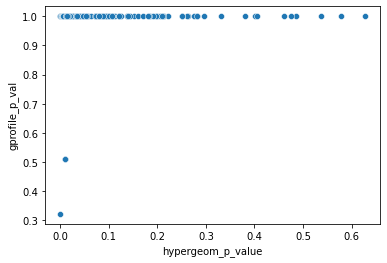

In [18]:
great.pl.scatterplot(enrichment_fdr,"hypergeom_p_value","gprofile_p_val",minus_log10=False)

with log scale

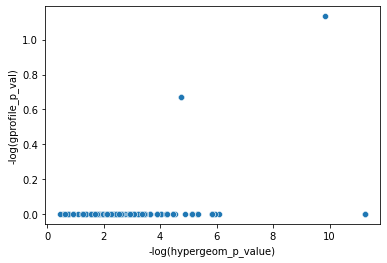

In [19]:
great.pl.scatterplot(enrichment_fdr,"hypergeom_p_value","gprofile_p_val",minus_log10=True)

### great_binom vs gprofiler_hypergeom

whithout log scale

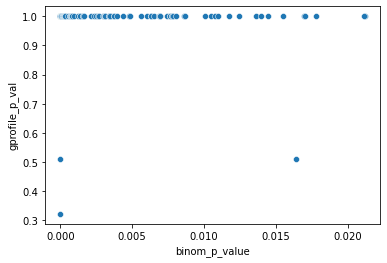

In [20]:
great.pl.scatterplot(enrichment_fdr,"binom_p_value","gprofile_p_val",minus_log10=False)

with log scale

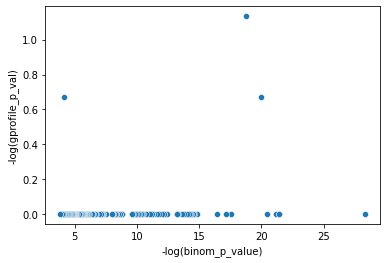

In [21]:
great.pl.scatterplot(enrichment_fdr,"binom_p_value","gprofile_p_val",minus_log10=True)

We can see that the values are totally different between the one returned by greatpy and GProfile. I have not been able to check my results on the great webserver for the moment because it is no longer accessible. 

However, it seems very strange that gprofile_p_val only returns 1. Could be related to the selection of GO ID between enrichment and gp

# Comparison with a fdr correction

In [22]:
gp_correct_fdr = GProfiler(return_dataframe=True)
gp_correct_fdr = gp_correct_fdr.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_fdr = gp_correct_fdr.loc[(gp_correct_fdr["source"] == "GO:MF")|(gp_correct_fdr["source"] == "GO:CC")|(gp_correct_fdr["source"] == "GO:BP")]

gp_correct_bonferroni = GProfiler(return_dataframe=True)
gp_correct_bonferroni = gp_correct_bonferroni.profile(organism='hsapiens',
            query=L,
            all_results=True,
            background=back,
            user_threshold=0.005,
            significance_threshold_method="fdr")

gp_correct_bonferroni = gp_correct_bonferroni.loc[(gp_correct_bonferroni["source"] == "GO:MF")|(gp_correct_bonferroni["source"] == "GO:CC")|(gp_correct_bonferroni["source"] == "GO:BP")]

In [23]:
val=[]
for i in enrichment_fdr.index: 
    try : 
        val.append(float(gp_correct_fdr.loc[gp_correct_fdr["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment_fdr["gprofile_p_val_fdr"] = val

val=[]
for i in enrichment_bonferroni.index: 
    try : 
        val.append(float(gp_correct_bonferroni.loc[gp_correct_bonferroni["native"] == i]["p_value"]))
    except:
        val.append(nan)
enrichment_bonferroni["gprofile_p_val_bonferroni"] = val

## Plot of the p-value with correction

### great_hypergeom_fdr vs gprofiler_hypergeom_fdr

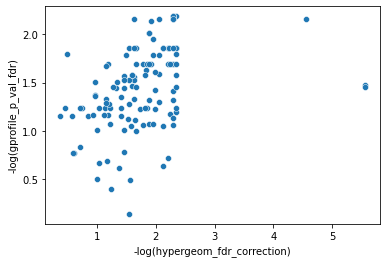

In [24]:
great.pl.scatterplot(enrichment_fdr,"hypergeom_fdr_correction","gprofile_p_val_fdr",minus_log10=True)

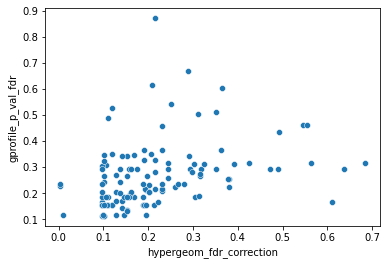

In [25]:
great.pl.scatterplot(enrichment_fdr,"hypergeom_fdr_correction","gprofile_p_val_fdr",minus_log10=False)

With a correction we observe that the distribution of p-value is slightly better. Although the values are probably wrong the fdr correction seems very important. 

### great_binom_fdr vs gprofiler_hypergeom_fdr

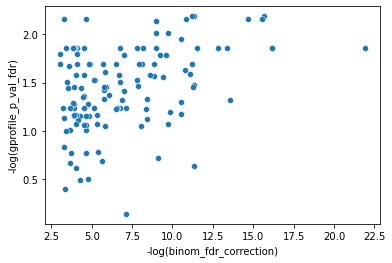

In [26]:
great.pl.scatterplot(enrichment_fdr,"binom_fdr_correction","gprofile_p_val_fdr",minus_log10=True)

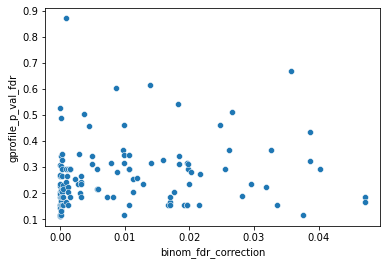

In [27]:
great.pl.scatterplot(enrichment_fdr,"binom_fdr_correction","gprofile_p_val_fdr",minus_log10=False)

### great_hypergeom_bonferroni vs gprofiler_hypergeom_bonferroni

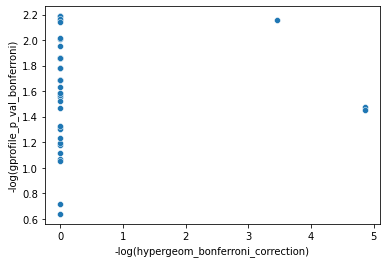

In [31]:
great.pl.scatterplot(enrichment_bonferroni,"hypergeom_bonferroni_correction","gprofile_p_val_bonferroni",minus_log10=True)

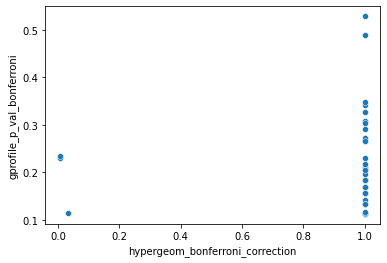

In [32]:
great.pl.scatterplot(enrichment_bonferroni,"hypergeom_bonferroni_correction","gprofile_p_val_bonferroni",minus_log10=False)

### great_binom_bonferroni vs gprofiler_hypergeom_bonferroni

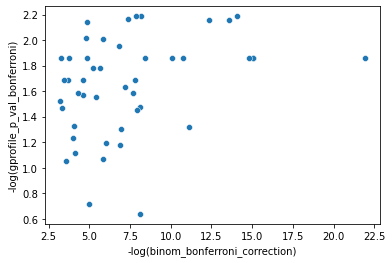

In [33]:
great.pl.scatterplot(enrichment_bonferroni,"binom_bonferroni_correction","gprofile_p_val_bonferroni",minus_log10=True)

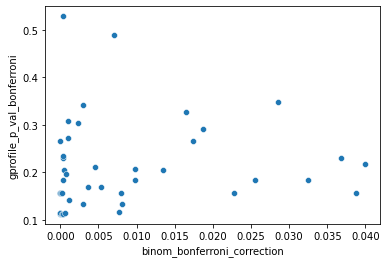

In [34]:
great.pl.scatterplot(enrichment_bonferroni,"binom_bonferroni_correction","gprofile_p_val_bonferroni",minus_log10=False)